# Bond Total Return, Yield-To-Maturity and the Yield Curve

This notebook derives the total return formula for bonds when coupons are reinvested at the YTM, then expresses it as a function of Nelson-Siegel yield curve factors (Level, Slope, Curvature).


## 1. Total Return with Constant Reinvestment Rate

### 1.1 General Formula (Any Reinvestment Rate)

When coupons are reinvested at a constant rate $r$, they grow to a future value by maturity. Each coupon payment $c$ received at time $t$ is reinvested until maturity $n$, growing for $(n-t)$ periods.

The **future value** of all coupons (geometric series):
$$FV_{coupons} = c \cdot \frac{(1+r)^n - 1}{r}$$

The **total return** of a bond with reinvestment rate $r$ is:
$$TR_r = \frac{c \cdot \frac{(1+r)^n - 1}{r} + P_N - P_0}{P_0}$$

where:
- $c$ = annual coupon payment
- $r$ = constant reinvestment rate
- $n$ = number of years to maturity
- $P_N$ = value at maturity (typically face value $F$)
- $P_0$ = purchase price

### 1.2 The Reinvestment Assumption

In practice, future reinvestment rates are uncertain. However, a natural benchmark is to assume coupons are reinvested at the bond's own yield-to-maturity: $r = y$.

This assumption reveals the **true meaning of YTM**: it is the compound annualized return an investor earns if they can reinvest all coupons at the YTM rate.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

print("Setup complete!")


Setup complete!


## 2. Bond Purchased at Par with Reinvestment at YTM

### 2.1 Par Bond Conditions

When a bond is purchased at par:
- $P_0 = F$ (purchase price equals face value)
- From bond pricing theory: $c = y \cdot P_0$ where $y$ is the YTM

### 2.2 Reinvestment at YTM ($r = y$)

**Assumption**: Coupons are reinvested at the yield-to-maturity rate.

Substituting $r = y$, $P_N = F = P_0$, and $c = y \cdot P_0$ into the general formula:

$$TR_y = \frac{y \cdot P_0 \cdot \frac{(1+y)^n - 1}{y} + P_0 - P_0}{P_0}$$

$$= \frac{y \cdot P_0 \cdot \frac{(1+y)^n - 1}{y}}{P_0}$$

The $y$ and $P_0$ terms cancel:

$$\boxed{TR_y = (1+y)^n - 1}$$

This is simply the **compound return** at rate $y$ for $n$ periods!

### 2.3 Key Insight: YTM as Annualized Return

The annualized return from this total return is:

$$\text{Annualized Return} = (1 + TR_y)^{1/n} - 1 = [(1+y)^n]^{1/n} - 1 = y$$

**Therefore**: When coupons are reinvested at the YTM, the bond delivers **exactly** its yield-to-maturity as the compound annualized return!

This is the true definition of YTM: the rate of return earned if:
1. The bond is held to maturity
2. All coupons are reinvested at the YTM rate
3. The bond is purchased at fair value (par)

### 2.4 Special Cases

**When $r = 0$ (no reinvestment)**:
$$TR_0 = n \cdot y$$
(Linear, not compound growth)

**When $r = y$ (reinvestment at YTM)**:
$$TR_y = (1+y)^n - 1$$
(Compound growth - delivers the YTM as annualized return!)


In [2]:
# Compare reinvestment assumptions

def total_return_general(n, y, r):
    """Calculate total return with any reinvestment rate"""
    if r == 0:
        return n * y
    else:
        return y * ((1 + r)**n - 1) / r

def total_return_at_ytm(n, y):
    """Calculate total return when r = y (simplified formula)"""
    return (1 + y)**n - 1

# Example calculations
maturities = np.array([5, 10, 15, 20, 30])
ytm = 0.04  # 4% yield

print("="*80)
print(f"TOTAL RETURNS FOR {ytm*100}% YTM BOND")
print("="*80)
print(f"\n{'Maturity':<10} {'TR (r=0%)':<15} {'TR (r=y)':<15} {'Annualized (r=y)':<20}")
print("-"*80)

for n in maturities:
    tr_no_reinv = total_return_general(n, ytm, 0) * 100
    tr_at_ytm = total_return_at_ytm(n, ytm) * 100
    annualized = ((1 + tr_at_ytm/100)**(1/n) - 1) * 100

    print(f"{n:<10} {tr_no_reinv:<15.2f} {tr_at_ytm:<15.2f} {annualized:<20.4f}")

print("\nNote: With r=y, the annualized return EXACTLY equals the YTM (4.00%)")
print("="*80)


TOTAL RETURNS FOR 4.0% YTM BOND

Maturity   TR (r=0%)       TR (r=y)        Annualized (r=y)    
--------------------------------------------------------------------------------
5          20.00           21.67           4.0000              
10         40.00           48.02           4.0000              
15         60.00           80.09           4.0000              
20         80.00           119.11          4.0000              
30         120.00          224.34          4.0000              

Note: With r=y, the annualized return EXACTLY equals the YTM (4.00%)


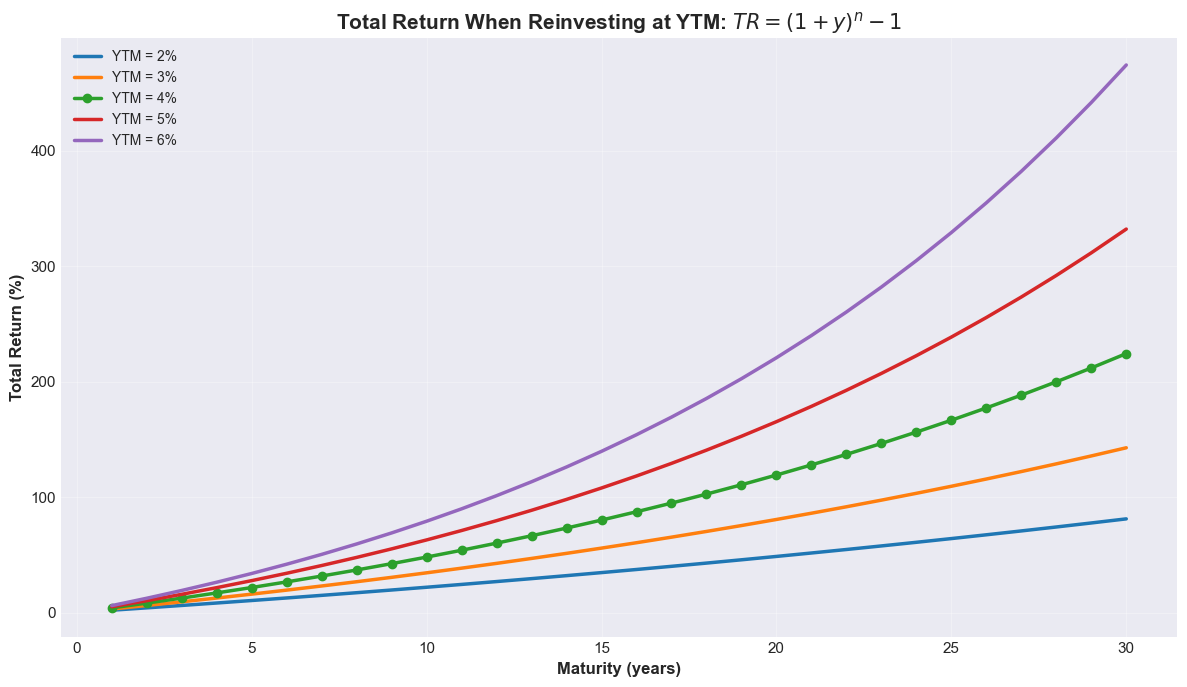

Notice the exponential (compound) growth pattern!
This is fundamentally different from linear growth (r=0).


In [3]:
# Visualization: Compound growth when reinvesting at YTM

fig, ax = plt.subplots(figsize=(12, 7))

ytm_levels = [0.02, 0.03, 0.04, 0.05, 0.06]
mats_plot = np.arange(1, 31)

for y in ytm_levels:
    # Total return when r = y
    returns = [total_return_at_ytm(n, y) * 100 for n in mats_plot]
    ax.plot(mats_plot, returns, marker='o' if y == 0.04 else None, 
            linewidth=2.5, markersize=6, label=f'YTM = {y*100:.0f}%')

ax.set_xlabel('Maturity (years)', fontweight='bold')
ax.set_ylabel('Total Return (%)', fontweight='bold')
ax.set_title('Total Return When Reinvesting at YTM: $TR = (1+y)^n - 1$', 
             fontweight='bold', fontsize=15)
ax.legend(loc='upper left', framealpha=0.95)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Notice the exponential (compound) growth pattern!")
print("This is fundamentally different from linear growth (r=0).")


## 3. YTM as Weighted Average of Spot Rates

### 3.1 Spot Rates vs YTM

The **yield curve** maps maturities to spot rates (yields on zero-coupon bonds).

The **YTM** is the single discount rate that equates a bond's price to its cash flows:

**Using spot rates** $s_1, s_2, \ldots, s_n$:
$$P_0 = \sum_{t=1}^{n-1} \frac{c}{(1+s_t)^t} + \frac{c+F}{(1+s_n)^n}$$

**Using YTM** $y$:
$$P_0 = \sum_{t=1}^{n-1} \frac{c}{(1+y)^t} + \frac{c+F}{(1+y)^n}$$

### 3.2 Weighted Average Interpretation

YTM behaves like a weighted average of spot rates where weights equal the present value of each cash flow:

$$w_t = \frac{PV(CF_t)}{P_0}$$

**Properties:**
1. If all spot rates are equal ($s_t = s$), then $y = s$
2. YTM lies between the minimum and maximum spot rates
3. Longer-maturity cash flows (especially principal) have largest weights


In [4]:
# Demonstrate YTM as weighted average

def bond_price_from_spots(c, F, spot_rates):
    """Calculate bond price using spot rates"""
    n = len(spot_rates)
    price = 0
    pv_flows = []

    for t in range(1, n + 1):
        cf = c if t < n else c + F
        pv = cf / (1 + spot_rates[t-1])**t
        price += pv
        pv_flows.append(pv)

    return price, np.array(pv_flows)

def ytm_from_price(c, F, price, n):
    """Solve for YTM given bond price"""
    def objective(y):
        p = sum(c / (1+y)**t for t in range(1, n)) + (c + F) / (1+y)**n
        return p - price

    return fsolve(objective, 0.04)[0]

# Example: 5-year bond
c = 5
F = 100
n = 5

scenarios = {
    'Normal (upward sloping)': np.array([0.02, 0.025, 0.03, 0.035, 0.04]),
    'Flat': np.array([0.03, 0.03, 0.03, 0.03, 0.03]),
    'Inverted (downward sloping)': np.array([0.05, 0.045, 0.04, 0.035, 0.03])
}

print("="*80)
print(f"YTM AS WEIGHTED AVERAGE: {n}-year bond, {c}% coupon, ${F} face value")
print("="*80)

for name, spots in scenarios.items():
    print(f"\n{name}:")
    print("-" * 60)

    price, pv_flows = bond_price_from_spots(c, F, spots)
    ytm = ytm_from_price(c, F, price, n)
    weights = pv_flows / price

    print(f"{'Year':<6} {'Spot':<10} {'Cash Flow':<12} {'PV':<12} {'Weight':<10}")
    for t in range(n):
        cf = c if t < n-1 else c + F
        print(f"{t+1:<6} {spots[t]*100:>5.2f}%    ${cf:>6.2f}      ${pv_flows[t]:>8.2f}    {weights[t]:>7.4f}")

    weighted_avg_spot = np.sum(weights * spots)

    print(f"\nBond Price: ${price:.2f}")
    print(f"YTM: {ytm*100:.4f}%")
    print(f"Spot rate range: [{spots.min()*100:.2f}%, {spots.max()*100:.2f}%]")
    print(f"Weighted avg spot: {weighted_avg_spot*100:.4f}%")


YTM AS WEIGHTED AVERAGE: 5-year bond, 5% coupon, $100 face value

Normal (upward sloping):
------------------------------------------------------------
Year   Spot       Cash Flow    PV           Weight    
1       2.00%    $  5.00      $    4.90     0.0467
2       2.50%    $  5.00      $    4.76     0.0454
3       3.00%    $  5.00      $    4.58     0.0436
4       3.50%    $  5.00      $    4.36     0.0415
5       4.00%    $105.00      $   86.30     0.8227

Bond Price: $104.90
YTM: 3.9031%
Spot rate range: [2.00%, 4.00%]
Weighted avg spot: 3.7741%

Flat:
------------------------------------------------------------
Year   Spot       Cash Flow    PV           Weight    
1       3.00%    $  5.00      $    4.85     0.0445
2       3.00%    $  5.00      $    4.71     0.0432
3       3.00%    $  5.00      $    4.58     0.0419
4       3.00%    $  5.00      $    4.44     0.0407
5       3.00%    $105.00      $   90.57     0.8297

Bond Price: $109.16
YTM: 3.0000%
Spot rate range: [3.00%, 3.00%]
W

## 4. Discrete Nelson-Siegel Model

### 4.1 Three-Factor Decomposition

The **Nelson-Siegel (NS) model** represents the yield curve using three factors:

$$y(t) = L + S \cdot f_S(t) + C \cdot f_C(t)$$

**Loading functions** for discrete maturity $t$:
$$f_S(t) = \frac{1 - e^{-\lambda t}}{\lambda t}$$

$$f_C(t) = \frac{1 - e^{-\lambda t}}{\lambda t} - e^{-\lambda t}$$

### 4.2 Factor Interpretation

| Factor | Symbol | Loading | Meaning |
|--------|--------|---------|---------|
| **Level** | $L$ | $f_L(t) = 1$ | Long-term rate level (parallel shifts) |
| **Slope** | $S$ | $f_S(t)$ | Short vs long rate spread (tilt) |
| **Curvature** | $C$ | $f_C(t)$ | Medium-term "belly" (bow) |

**Decay parameter** $\lambda$: Typically $\lambda = 0.0609$ (Diebold-Li)
- Determines where curvature peaks (~2.5 years)
- Controls decay speed of slope effect

### 4.3 Loading Function Behavior

- **Level**: Constant at 1 for all maturities
- **Slope**: $f_S(t) \to 1$ as $t \to 0$, $f_S(t) \to 0$ as $t \to \infty$
- **Curvature**: Peaks at intermediate maturities, approaches 0 at extremes


In [5]:
# Nelson-Siegel implementation

def f_slope(t, lam=0.0609):
    """Slope loading function"""
    return (1 - np.exp(-lam * t)) / (lam * t)

def f_curvature(t, lam=0.0609):
    """Curvature loading function"""
    return (1 - np.exp(-lam * t)) / (lam * t) - np.exp(-lam * t)

def nelson_siegel(t, L, S, C, lam=0.0609):
    """Yield at maturity t from NS model"""
    return L + S * f_slope(t, lam) + C * f_curvature(t, lam)

# Display loading functions
lam = 0.0609
mats = [1, 2, 3, 5, 7, 10, 15, 20, 30]

print("Nelson-Siegel Loading Functions (λ = {:.4f}):\n".format(lam))
print(f"{'Maturity':<10} {'f_L(t)':<12} {'f_S(t)':<12} {'f_C(t)':<12}")
print("-" * 50)
for t in mats:
    fl = 1.0
    fs = f_slope(t, lam)
    fc = f_curvature(t, lam)
    print(f"{t:<10} {fl:<12.6f} {fs:<12.6f} {fc:<12.6f}")


Nelson-Siegel Loading Functions (λ = 0.0609):

Maturity   f_L(t)       f_S(t)       f_C(t)      
--------------------------------------------------
1          1.000000     0.970159     0.029242    
2          1.000000     0.941499     0.056174    
3          1.000000     0.913968     0.080950    
5          1.000000     0.862095     0.124603    
7          1.000000     0.814167     0.161247    
10         1.000000     0.748942     0.205047    
15         1.000000     0.655591     0.254473    
20         1.000000     0.578143     0.282322    
30         1.000000     0.459280     0.298384    


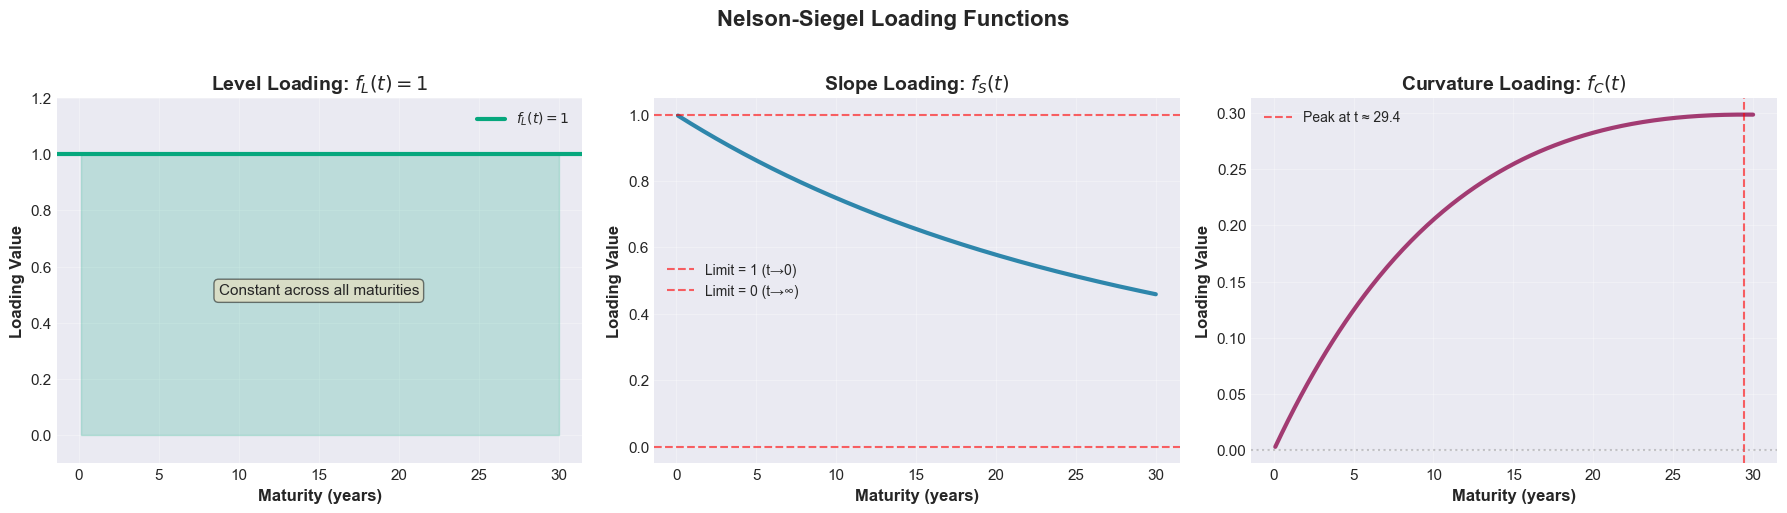


Loading Summary:
  • Level:     Parallel shifts (constant = 1)
  • Slope:     Decays from 1 to 0 (short → long)
  • Curvature: Peaks at medium-term, zero at extremes


In [6]:
# Plot all three loading functions

t_range = np.linspace(0.1, 30, 300)
lam = 0.0609

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Level loading
axes[0].axhline(1, linewidth=3, color='#06A77D', label='$f_L(t) = 1$')
axes[0].fill_between(t_range, 0, 1, alpha=0.2, color='#06A77D')
axes[0].set_xlabel('Maturity (years)', fontweight='bold')
axes[0].set_ylabel('Loading Value', fontweight='bold')
axes[0].set_title('Level Loading: $f_L(t) = 1$', fontweight='bold', fontsize=14)
axes[0].set_ylim(-0.1, 1.2)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(15, 0.5, 'Constant across all maturities', ha='center', fontsize=11, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Slope loading
axes[1].plot(t_range, f_slope(t_range, lam), linewidth=3, color='#2E86AB')
axes[1].axhline(1, color='red', linestyle='--', alpha=0.6, linewidth=1.5, label='Limit = 1 (t→0)')
axes[1].axhline(0, color='red', linestyle='--', alpha=0.6, linewidth=1.5, label='Limit = 0 (t→∞)')
axes[1].set_xlabel('Maturity (years)', fontweight='bold')
axes[1].set_ylabel('Loading Value', fontweight='bold')
axes[1].set_title('Slope Loading: $f_S(t)$', fontweight='bold', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Curvature loading
fc_vals = f_curvature(t_range, lam)
peak_idx = np.argmax(fc_vals)
axes[2].plot(t_range, fc_vals, linewidth=3, color='#A23B72')
axes[2].axvline(t_range[peak_idx], color='red', linestyle='--', alpha=0.6, 
                linewidth=1.5, label=f'Peak at t ≈ {t_range[peak_idx]:.1f}')
axes[2].axhline(0, color='gray', linestyle=':', alpha=0.4)
axes[2].set_xlabel('Maturity (years)', fontweight='bold')
axes[2].set_ylabel('Loading Value', fontweight='bold')
axes[2].set_title('Curvature Loading: $f_C(t)$', fontweight='bold', fontsize=14)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle('Nelson-Siegel Loading Functions', fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\nLoading Summary:")
print("  • Level:     Parallel shifts (constant = 1)")
print("  • Slope:     Decays from 1 to 0 (short → long)")
print("  • Curvature: Peaks at medium-term, zero at extremes")


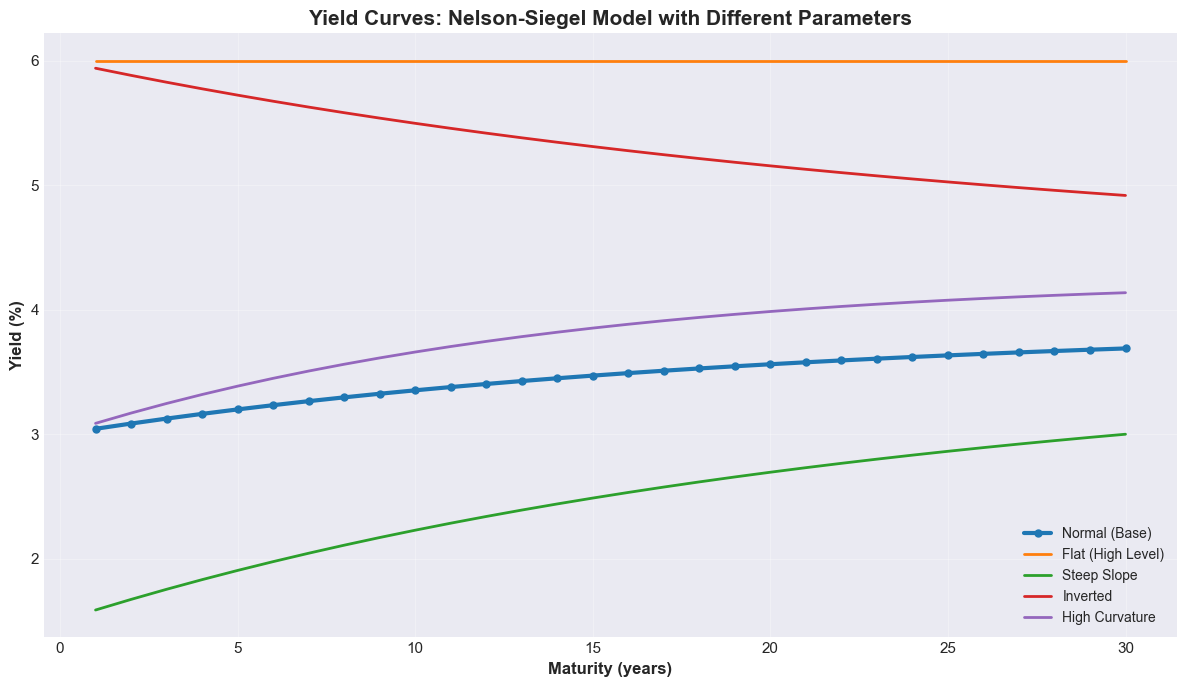


Yield Curves at Selected Maturities:
    Normal (Base)  Flat (High Level)  Steep Slope  Inverted  High Curvature
1           3.044                6.0        1.589     5.940           3.088
2           3.087                6.0        1.674     5.883           3.171
5           3.200                6.0        1.907     5.724           3.387
10          3.354                6.0        2.230     5.498           3.661
20          3.563                6.0        2.696     5.156           3.987
30          3.690                6.0        3.001     4.919           4.137


In [7]:
# Generate yield curves with different NS parameters

t_range_plot = np.arange(1, 31)

scenarios = {
    'Normal (Base)': (0.04, -0.01, 0.005),
    'Flat (High Level)': (0.06, 0.0, 0.0),
    'Steep Slope': (0.04, -0.025, 0.005),
    'Inverted': (0.04, 0.02, 0.0),
    'High Curvature': (0.04, -0.01, 0.02)
}

fig, ax = plt.subplots(figsize=(12, 7))

for label, (L, S, C) in scenarios.items():
    yields = [nelson_siegel(t, L, S, C) * 100 for t in t_range_plot]
    linewidth = 3 if 'Base' in label else 2
    ax.plot(t_range_plot, yields, linewidth=linewidth, label=label, 
            marker='o' if 'Base' in label else None, markersize=5)

ax.set_xlabel('Maturity (years)', fontweight='bold')
ax.set_ylabel('Yield (%)', fontweight='bold')
ax.set_title('Yield Curves: Nelson-Siegel Model with Different Parameters', 
             fontweight='bold', fontsize=15)
ax.legend(loc='best', framealpha=0.95)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print table
print("\nYield Curves at Selected Maturities:")
print("="*80)
df_yields = pd.DataFrame(index=[1, 2, 5, 10, 20, 30])
for label, (L, S, C) in scenarios.items():
    df_yields[label] = [nelson_siegel(t, L, S, C)*100 for t in df_yields.index]
print(df_yields.round(3))


## 5. Total Return as Function of NS Factors (with $r = y$)

### 5.1 Derivation

For a bond with maturity $n$ years purchased at par:
1. From Section 2: $TR = (1+y)^n - 1$ (when reinvesting at YTM)
2. From Section 4: $y(n) = L + S \cdot f_S(n) + C \cdot f_C(n)$

Substituting (2) into (1):

$$\boxed{TR(L, S, C) = \left[1 + L + S \cdot f_S(n) + C \cdot f_C(n)\right]^n - 1}$$

This expresses total return as a **nonlinear function** of the Nelson-Siegel factors.

### 5.2 Expanding the Formula

We can also write:

$$TR(L, S, C) = (1 + y_n)^n - 1$$

where $y_n = L + S \cdot f_S(n) + C \cdot f_C(n)$ is the yield at maturity $n$.

The total return grows **exponentially** with the yield (compound growth), not linearly as in the zero-reinvestment case.

### 5.3 Component Analysis

While the formula is compact, we can still understand how each factor contributes:

**Level ($L$)**: Dominant factor - directly adds to the yield $y_n$ which is then compounded

**Slope ($S$)**: Weighted by $f_S(n)$, contribution decreases with maturity
- For $n=1$ year: $f_S(1) \approx 0.97$ (high impact)
- For $n=30$ years: $f_S(30) \approx 0.46$ (lower impact)

**Curvature ($C$)**: Weighted by $f_C(n)$, peaks at intermediate maturities
- For $n=1$ year: $f_C(1) \approx 0.03$ (low impact)
- For $n=5$ years: $f_C(5) \approx 0.12$ (moderate impact)
- For $n=30$ years: $f_C(30) \approx 0.30$ (higher impact)

### 5.4 Comparison with Zero Reinvestment

**With reinvestment at YTM**: $TR = (1+y_n)^n - 1$ (exponential)

**Without reinvestment** ($r=0$): $TR_0 = n \cdot y_n$ (linear)

The difference grows dramatically with maturity and yield level.


In [8]:
# Total return with NS factors and r = y

def total_return_ns_at_ytm(n, L, S, C, lam=0.0609):
    """Total return when reinvesting at YTM: TR = (1+y)^n - 1"""
    ytm = nelson_siegel(n, L, S, C, lam)
    return (1 + ytm)**n - 1

def total_return_ns_no_reinvest(n, L, S, C, lam=0.0609):
    """Total return with no reinvestment: TR = n * y (for comparison)"""
    ytm = nelson_siegel(n, L, S, C, lam)
    return n * ytm

# Example calculation
L, S, C = 0.03, -0.01, 0.005
mats = [1, 2, 3, 5, 7, 10, 15, 20, 30]

print("="*80)
print(f"TOTAL RETURN COMPARISON: Reinvest at YTM vs. No Reinvestment")
print(f"NS Parameters: L={L*100}%, S={S*100}%, C={C*100}%")
print("="*80)

results = []
for n in mats:
    ytm = nelson_siegel(n, L, S, C) * 100
    tr_at_ytm = total_return_ns_at_ytm(n, L, S, C) * 100
    tr_no_reinv = total_return_ns_no_reinvest(n, L, S, C) * 100
    benefit = tr_at_ytm - tr_no_reinv

    results.append({
        'Maturity': n,
        'YTM': ytm,
        'TR (r=y)': tr_at_ytm,
        'TR (r=0)': tr_no_reinv,
        'Benefit': benefit
    })

df_comp = pd.DataFrame(results)
print("\n", df_comp.round(2))

print("\nNote: The 'Benefit' column shows the extra return from reinvesting at YTM")
print("This benefit grows dramatically with maturity due to compound growth!")


TOTAL RETURN COMPARISON: Reinvest at YTM vs. No Reinvestment
NS Parameters: L=3.0%, S=-1.0%, C=0.5%

    Maturity   YTM  TR (r=y)  TR (r=0)  Benefit
0         1  2.04      2.04      2.04    -0.00
1         2  2.09      4.22      4.17     0.04
2         3  2.13      6.52      6.38     0.14
3         5  2.20     11.50     11.00     0.49
4         7  2.27     16.99     15.87     1.12
5        10  2.35     26.19     23.54     2.66
6        15  2.47     44.23     37.07     7.16
7        20  2.56     65.89     51.26    14.63
8        30  2.69    121.73     80.70    41.04

Note: The 'Benefit' column shows the extra return from reinvesting at YTM
This benefit grows dramatically with maturity due to compound growth!


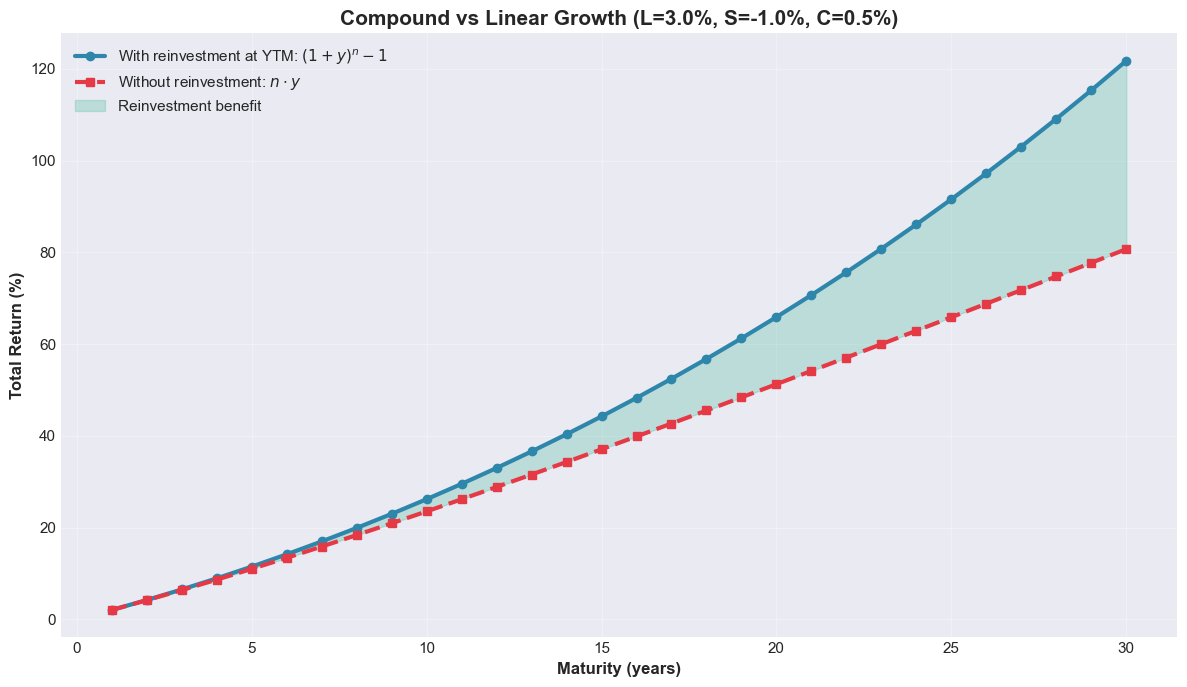

The shaded area represents the value of reinvesting coupons at YTM!


In [9]:
# Visualize: Compound vs Linear growth

fig, ax = plt.subplots(figsize=(12, 7))

L, S, C = 0.03, -0.01, 0.005
mats_plot = np.arange(1, 31)

# With reinvestment at YTM (compound)
tr_compound = [total_return_ns_at_ytm(n, L, S, C) * 100 for n in mats_plot]

# Without reinvestment (linear)
tr_linear = [total_return_ns_no_reinvest(n, L, S, C) * 100 for n in mats_plot]

ax.plot(mats_plot, tr_compound, linewidth=3, marker='o', markersize=6, 
        label='With reinvestment at YTM: $(1+y)^n - 1$', color='#2E86AB')
ax.plot(mats_plot, tr_linear, linewidth=3, marker='s', markersize=6,
        label='Without reinvestment: $n \cdot y$', color='#E63946', linestyle='--')

# Fill area between
ax.fill_between(mats_plot, tr_linear, tr_compound, alpha=0.2, color='#06A77D', 
                label='Reinvestment benefit')

ax.set_xlabel('Maturity (years)', fontweight='bold')
ax.set_ylabel('Total Return (%)', fontweight='bold')
ax.set_title(f'Compound vs Linear Growth (L={L*100}%, S={S*100}%, C={C*100}%)', 
             fontweight='bold', fontsize=15)
ax.legend(loc='upper left', framealpha=0.95, fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("The shaded area represents the value of reinvesting coupons at YTM!")


## 6. Understanding Factor Contributions

### 6.1 Yield Decomposition

While total return is a nonlinear function of the NS factors, we can decompose the **yield** linearly:

$$y(n) = L + S \cdot f_S(n) + C \cdot f_C(n)$$

Then: $TR = (1 + y)^n - 1$

### 6.2 Factor Contributions to Yield

For each maturity, we can calculate how each factor contributes to the yield:
- **Level contribution**: $y_L = L$
- **Slope contribution**: $y_S = S \cdot f_S(n)$
- **Curvature contribution**: $y_C = C \cdot f_C(n)$

Total: $y = y_L + y_S + y_C$

### 6.3 Approximate Total Return Contributions

For small yields and moderate maturities, we can approximate:

$$(1+y)^n \approx 1 + n \cdot y + \frac{n(n-1)}{2} y^2 + \ldots$$

The **linear approximation** gives:
$$TR \approx n \cdot (y_L + y_S + y_C) = n \cdot L + n \cdot S \cdot f_S(n) + n \cdot C \cdot f_C(n)$$

But this ignores the compounding benefit, which is substantial for long maturities!


In [10]:
# Analyze yield contributions

L, S, C = 0.03, -0.01, 0.005
mats = [1, 2, 3, 5, 7, 10, 15, 20, 30]

print("="*80)
print(f"YIELD DECOMPOSITION BY FACTOR")
print(f"NS Parameters: L={L*100}%, S={S*100}%, C={C*100}%")
print("="*80)

results_yield = []
for n in mats:
    fs = f_slope(n)
    fc = f_curvature(n)

    y_level = L * 100
    y_slope = S * fs * 100
    y_curve = C * fc * 100
    y_total = nelson_siegel(n, L, S, C) * 100

    tr_total = total_return_ns_at_ytm(n, L, S, C) * 100

    results_yield.append({
        'Maturity': n,
        'Level': y_level,
        'Slope': y_slope,
        'Curvature': y_curve,
        'Total Yield': y_total,
        'Total Return': tr_total
    })

df_yield_decomp = pd.DataFrame(results_yield)
print("\n", df_yield_decomp.round(3))

print("\nPercentage of Yield from Each Factor:")
df_pct_yield = pd.DataFrame({
    'Maturity': df_yield_decomp['Maturity'],
    'Level %': (df_yield_decomp['Level'] / df_yield_decomp['Total Yield'] * 100).round(1),
    'Slope %': (df_yield_decomp['Slope'] / df_yield_decomp['Total Yield'] * 100).round(1),
    'Curvature %': (df_yield_decomp['Curvature'] / df_yield_decomp['Total Yield'] * 100).round(1)
})
print("\n", df_pct_yield)


YIELD DECOMPOSITION BY FACTOR
NS Parameters: L=3.0%, S=-1.0%, C=0.5%

    Maturity  Level  Slope  Curvature  Total Yield  Total Return
0         1    3.0 -0.970      0.015        2.044         2.044
1         2    3.0 -0.941      0.028        2.087         4.217
2         3    3.0 -0.914      0.040        2.127         6.516
3         5    3.0 -0.862      0.062        2.200        11.496
4         7    3.0 -0.814      0.081        2.266        16.986
5        10    3.0 -0.749      0.103        2.354        26.192
6        15    3.0 -0.656      0.127        2.472        44.230
7        20    3.0 -0.578      0.141        2.563        65.888
8        30    3.0 -0.459      0.149        2.690       121.735

Percentage of Yield from Each Factor:

    Maturity  Level %  Slope %  Curvature %
0         1    146.7    -47.5          0.7
1         2    143.8    -45.1          1.3
2         3    141.1    -43.0          1.9
3         5    136.4    -39.2          2.8
4         7    132.4    -35.9    

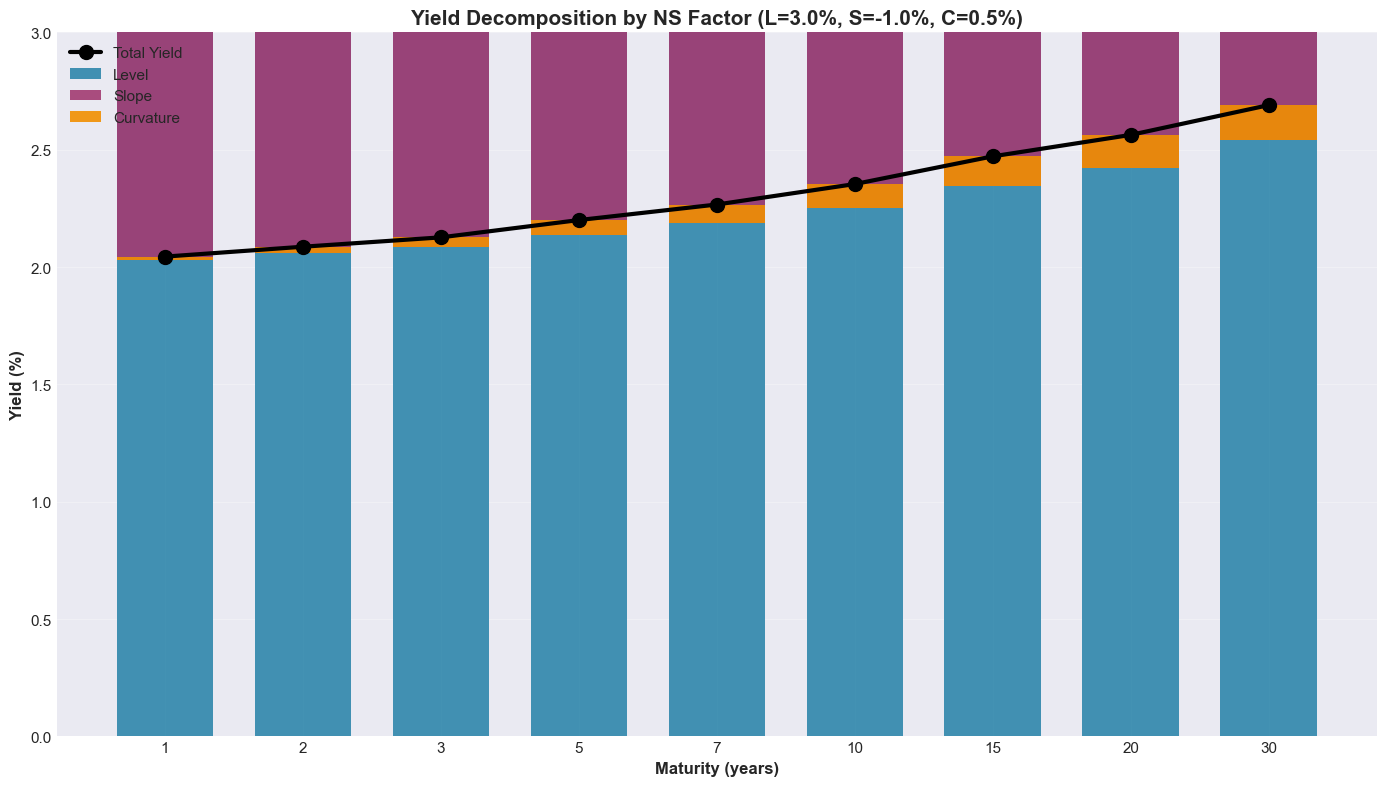

Remember: Total Return = (1 + Total Yield)^n - 1
The yield is linear in factors, but total return is exponential!


In [11]:
# Visualize yield decomposition

fig, ax = plt.subplots(figsize=(14, 8))

x_pos = np.arange(len(mats))
bar_width = 0.7

# Stacked bars for yield components (in basis points for better visibility)
level_contrib = df_yield_decomp['Level']
slope_contrib = df_yield_decomp['Slope']
curve_contrib = df_yield_decomp['Curvature']

p1 = ax.bar(x_pos, level_contrib, bar_width, label='Level', color='#2E86AB', alpha=0.9)
p2 = ax.bar(x_pos, slope_contrib, bar_width, bottom=level_contrib,
            label='Slope', color='#A23B72', alpha=0.9)
p3 = ax.bar(x_pos, curve_contrib, bar_width, 
            bottom=level_contrib + slope_contrib,
            label='Curvature', color='#F18F01', alpha=0.9)

# Total yield line
ax.plot(x_pos, df_yield_decomp['Total Yield'], color='black', marker='o', 
        linewidth=3, markersize=10, label='Total Yield', zorder=10)

ax.set_xlabel('Maturity (years)', fontweight='bold')
ax.set_ylabel('Yield (%)', fontweight='bold')
ax.set_title(f'Yield Decomposition by NS Factor (L={L*100}%, S={S*100}%, C={C*100}%)', 
             fontweight='bold', fontsize=15)
ax.set_xticks(x_pos)
ax.set_xticklabels(mats)
ax.legend(loc='upper left', framealpha=0.95, fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Remember: Total Return = (1 + Total Yield)^n - 1")
print("The yield is linear in factors, but total return is exponential!")


## 7. Sensitivity Analysis

How does total return respond to changes in each NS factor when reinvesting at YTM?


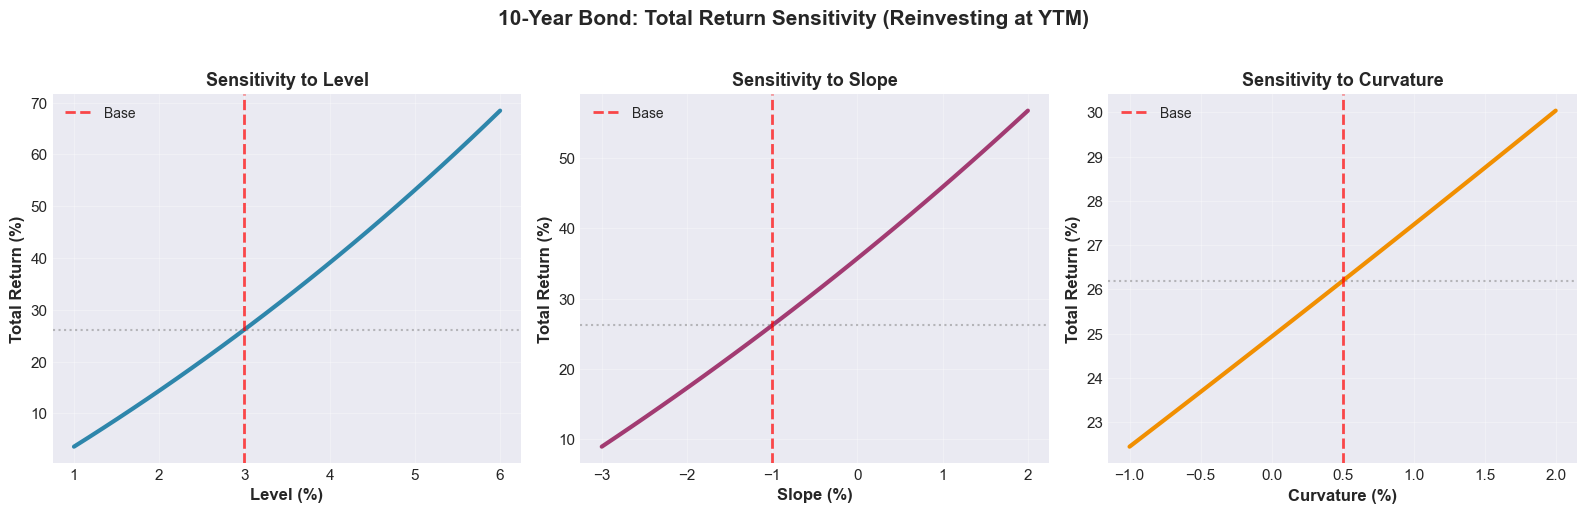


Base Total Return: 26.19%
Base YTM: 2.354%

Sensitivities (ΔTR per 1% change in factor):
  Level:     12.885%  ← Highest impact
  Slope:      9.544%
  Curvature:  2.551%  ← Lowest impact

Note: Sensitivities are nonlinear due to compounding!


In [12]:
# Sensitivity analysis for 10-year bond

n_base = 10
L_base, S_base, C_base = 0.03, -0.01, 0.005

# Vary each parameter
L_range = np.linspace(0.01, 0.06, 30)
S_range = np.linspace(-0.03, 0.02, 30)
C_range = np.linspace(-0.01, 0.02, 30)

# Calculate total returns when r = y
tr_L = [total_return_ns_at_ytm(n_base, L, S_base, C_base) * 100 for L in L_range]
tr_S = [total_return_ns_at_ytm(n_base, L_base, S, C_base) * 100 for S in S_range]
tr_C = [total_return_ns_at_ytm(n_base, L_base, S_base, C) * 100 for C in C_range]

# Base case
tr_base = total_return_ns_at_ytm(n_base, L_base, S_base, C_base) * 100

# Plot
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Level sensitivity
axes[0].plot(L_range * 100, tr_L, linewidth=3, color='#2E86AB')
axes[0].axvline(L_base * 100, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Base')
axes[0].axhline(tr_base, color='gray', linestyle=':', alpha=0.5)
axes[0].set_xlabel('Level (%)', fontweight='bold')
axes[0].set_ylabel('Total Return (%)', fontweight='bold')
axes[0].set_title('Sensitivity to Level', fontweight='bold', fontsize=13)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Slope sensitivity
axes[1].plot(S_range * 100, tr_S, linewidth=3, color='#A23B72')
axes[1].axvline(S_base * 100, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Base')
axes[1].axhline(tr_base, color='gray', linestyle=':', alpha=0.5)
axes[1].set_xlabel('Slope (%)', fontweight='bold')
axes[1].set_ylabel('Total Return (%)', fontweight='bold')
axes[1].set_title('Sensitivity to Slope', fontweight='bold', fontsize=13)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Curvature sensitivity
axes[2].plot(C_range * 100, tr_C, linewidth=3, color='#F18F01')
axes[2].axvline(C_base * 100, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Base')
axes[2].axhline(tr_base, color='gray', linestyle=':', alpha=0.5)
axes[2].set_xlabel('Curvature (%)', fontweight='bold')
axes[2].set_ylabel('Total Return (%)', fontweight='bold')
axes[2].set_title('Sensitivity to Curvature', fontweight='bold', fontsize=13)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle(f'{n_base}-Year Bond: Total Return Sensitivity (Reinvesting at YTM)', 
             fontweight='bold', fontsize=15, y=1.02)
plt.tight_layout()
plt.show()

# Numerical sensitivities
delta = 0.01  # 1% change
sens_L = (total_return_ns_at_ytm(n_base, L_base+delta, S_base, C_base)*100 - tr_base) / (delta*100)
sens_S = (total_return_ns_at_ytm(n_base, L_base, S_base+delta, C_base)*100 - tr_base) / (delta*100)
sens_C = (total_return_ns_at_ytm(n_base, L_base, S_base, C_base+delta)*100 - tr_base) / (delta*100)

print(f"\nBase Total Return: {tr_base:.2f}%")
print(f"Base YTM: {nelson_siegel(n_base, L_base, S_base, C_base)*100:.3f}%")
print(f"\nSensitivities (ΔTR per 1% change in factor):")
print(f"  Level:     {sens_L:>6.3f}%  ← Highest impact")
print(f"  Slope:     {sens_S:>6.3f}%")
print(f"  Curvature: {sens_C:>6.3f}%  ← Lowest impact")
print("\nNote: Sensitivities are nonlinear due to compounding!")


## 8. Summary and Key Formulas

### 8.1 Main Results

**Total Return with Reinvestment at YTM** (par bond):
$$TR = (1+y)^n - 1$$

This is the compound return formula. The bond delivers **exactly** its YTM as the annualized return.

**Nelson-Siegel Yield Curve**:
$$y(t) = L + S \cdot \frac{1-e^{-\lambda t}}{\lambda t} + C \cdot \left[\frac{1-e^{-\lambda t}}{\lambda t} - e^{-\lambda t}\right]$$

**Total Return with NS Factors** (when $r = y$):
$$TR(L,S,C) = \left[1 + L + S \cdot f_S(n) + C \cdot f_C(n)\right]^n - 1$$

### 8.2 Key Insights

1. **Reinvestment at YTM is special**: It's the only rate that delivers the YTM as the realized annualized return
   - If $r < y$: realized return < YTM
   - If $r = y$: realized return = YTM exactly!
   - If $r > y$: realized return > YTM

2. **YTM as weighted average**: The yield-to-maturity reflects all spot rates along the yield curve, with weights based on cash flow present values

3. **Three-factor structure**: The Nelson-Siegel model decomposes yields into:
   - **Level (L)**: Parallel shifts (dominant factor, ~95% of yield)
   - **Slope (S)**: Curve tilt (short vs long rates)
   - **Curvature (C)**: Belly movements (peaks at medium-term)

4. **Exponential growth**: Unlike zero reinvestment (linear: $TR = n \cdot y$), reinvestment at YTM produces compound growth: $TR = (1+y)^n - 1$

5. **Nonlinear factor impact**: Because TR is exponential in yield, and yield is linear in factors, the total return is nonlinear in L, S, and C

### 8.3 Practical Implications

**Why this matters:**
- YTM assumes reinvestment at the YTM rate - rarely achieved in practice
- **Reinvestment risk**: If rates fall, realized returns < YTM
- Longer maturity and higher coupon bonds have **more reinvestment risk**
- Zero-coupon bonds have **no reinvestment risk**

**Applications:**

**Portfolio Management:**
- Understand that quoted YTMs assume reinvestment at those rates
- Consider realistic reinvestment rate assumptions
- Balance duration and reinvestment risk

**Risk Management:**
- Factor-based decomposition enables targeted hedging
- Level risk dominates for most bonds
- Slope and curvature matter more for certain maturities

**Performance Attribution:**
- Separate yield changes into Level, Slope, Curvature components
- Understand compound growth benefit of reinvestment

**Scenario Analysis:**
- Model yield curve changes through NS factor shifts
- Evaluate TR under different rate environments

### 8.4 Formula Summary Card

| Concept | Formula | Notes |
|---------|---------|-------|
| YTM (par bond) | $c = y \cdot P_0$ | Coupon = yield × price |
| TR at YTM | $TR = (1+y)^n - 1$ | Compound return |
| TR no reinvest | $TR = n \cdot y$ | Linear return |
| NS yield | $y = L + S \cdot f_S + C \cdot f_C$ | Linear in factors |
| Slope loading | $f_S(t) = \frac{1-e^{-\lambda t}}{\lambda t}$ | Decays: 1 → 0 |
| Curve loading | $f_C(t) = f_S(t) - e^{-\lambda t}$ | Peaks at ~2.5yr |
| Annualized return | $(1+TR)^{1/n} - 1 = y$ | When $r = y$ |

### 8.5 Extensions

This framework can be extended to:
- Time-varying reinvestment rates (Case 3)
- Bonds not purchased at par
- Dynamic Nelson-Siegel models (time-varying factors)
- Credit spread decomposition
- Multi-curve frameworks (OIS, LIBOR, etc.)
